In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
df = pd.read_csv('lending_club_loan.csv')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [119]:
# Exploratory Analysis

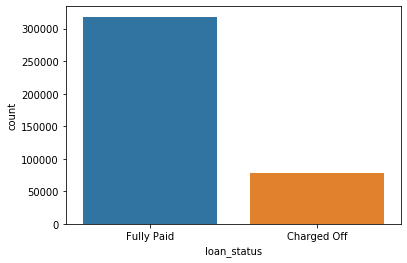

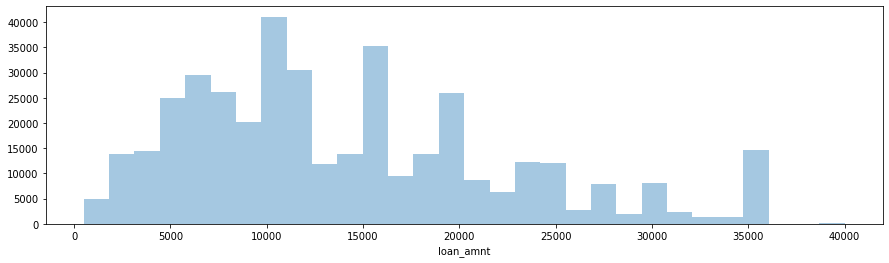

In [120]:
sns.countplot(x='loan_status',data=df)

fig=plt.figure(figsize=(15,4))
sns.distplot(df['loan_amnt'],bins=30,kde=False)

loan_amnt               1.000000
installment             0.953929
annual_inc              0.336887
revol_bal               0.328320
total_acc               0.223886
mort_acc                0.222315
open_acc                0.198556
int_rate                0.168921
revol_util              0.099911
dti                     0.016636
pub_rec                -0.077779
pub_rec_bankruptcies   -0.106539
Name: loan_amnt, dtype: float64


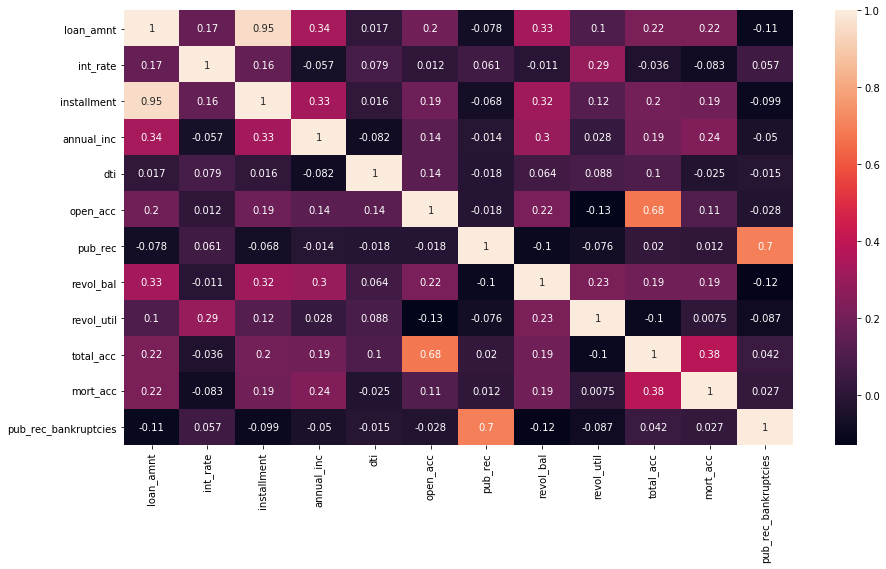

In [121]:
print(df.corr()['loan_amnt'].sort_values(ascending=False))

fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

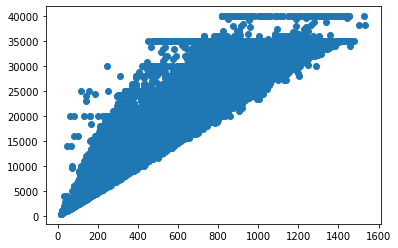

In [122]:
plt.scatter(y='loan_amnt',x='installment',data=df)

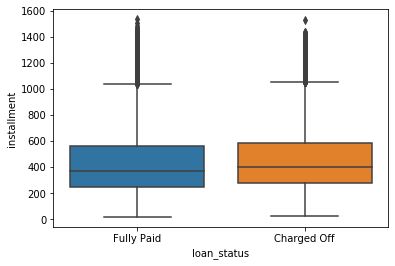

In [123]:
sns.boxplot(x='loan_status',y='installment',data=df)

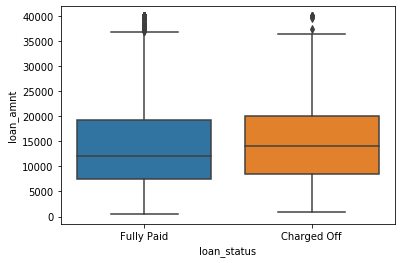

In [124]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [125]:
df.groupby('loan_status')['loan_amnt'].describe().transpose()

loan_status,Charged Off,Fully Paid
count,77673.000000,318357.000000
mean,15126.300967,13866.878771
std,8505.090557,8302.319699
min,1000.000000,500.000000
25%,8525.000000,7500.000000
50%,14000.000000,12000.000000
75%,20000.000000,19225.000000
max,40000.000000,40000.000000


In [126]:
grade_list=sorted(df['grade'].unique())
print('Grade_list:')
print(grade_list)

print('\n')

print('sub_grade_list:')
print(df['sub_grade'].unique())

Grade_list:
['A', 'B', 'C', 'D', 'E', 'F', 'G']


sub_grade_list:
['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


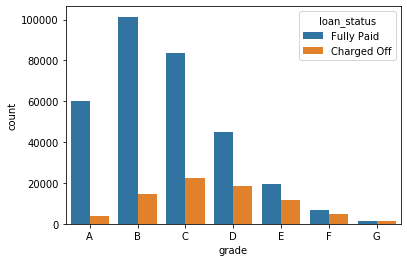

In [127]:
sns.countplot(x='grade',data=df,hue='loan_status',order=grade_list)

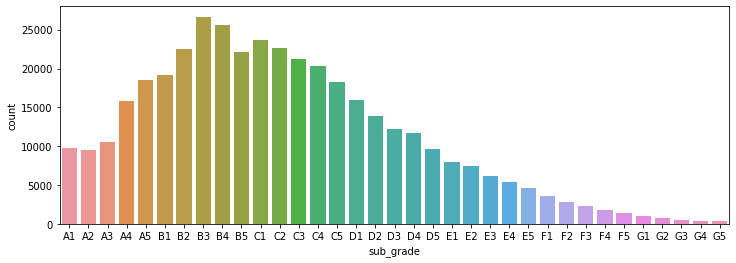

In [128]:
fig=plt.figure(figsize=(12,4))
grade_list_sorted = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order =grade_list_sorted)

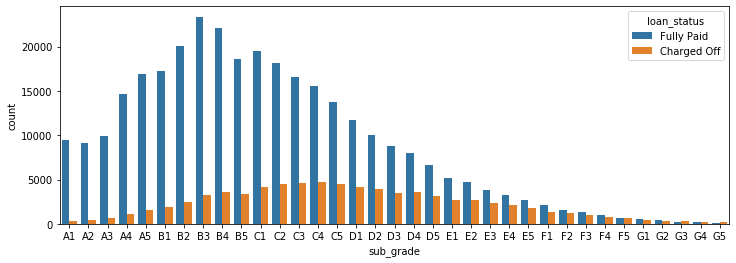

In [129]:
fig=plt.figure(figsize=(12,4))
grade_list_sorted = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order =grade_list_sorted,hue='loan_status')

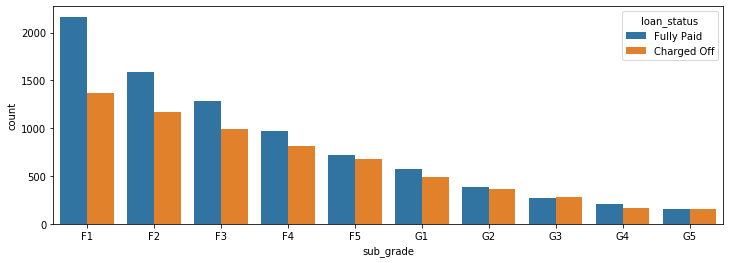

In [130]:
df_isolate_F_G=df[(df['grade']=="F")|(df['grade']=="G")]

fig=plt.figure(figsize=(12,4))

sns.countplot(x='sub_grade',data=df_isolate_F_G,order =sorted(df_isolate_F_G['sub_grade'].unique()), hue='loan_status')

In [131]:
def loan(x):
    if x=='Fully Paid':
        return 1
    else:
        return 0
df['loan_repaid']=df['loan_status'].apply(loan)

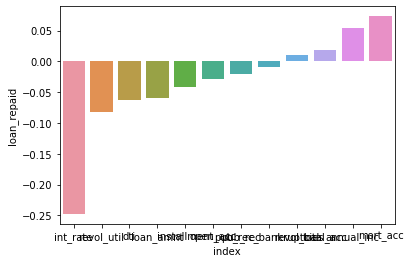

In [132]:
d1=pd.DataFrame(df.corr()['loan_repaid']).reset_index().sort_values('loan_repaid')
sns.barplot(x='index',y='loan_repaid',data=d1[0:-1])

In [133]:
#Data Processing

In [134]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [135]:
#percetage missing data
(df.isnull().sum()*100)/(df.describe().loc['count'].max())

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [136]:
df=df.drop('emp_title',axis=1)

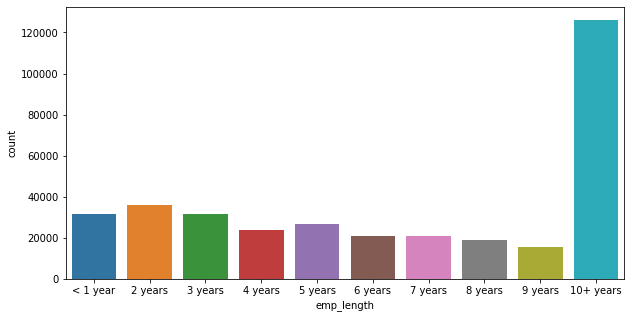

In [137]:
empl_length_order = ['< 1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
fig=plt.figure(figsize=(10,5))
sns.countplot('emp_length',data=df,order=empl_length_order)

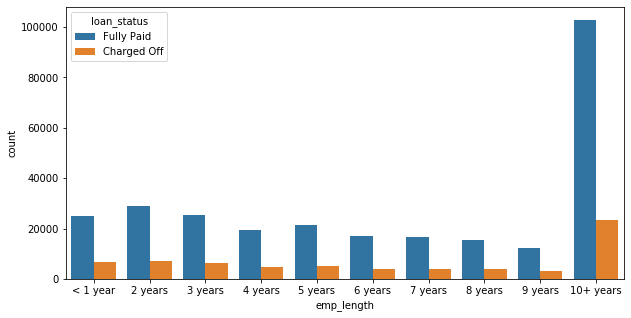

In [138]:
fig=plt.figure(figsize=(10,5))
sns.countplot('emp_length',data=df,order=empl_length_order,hue='loan_status')

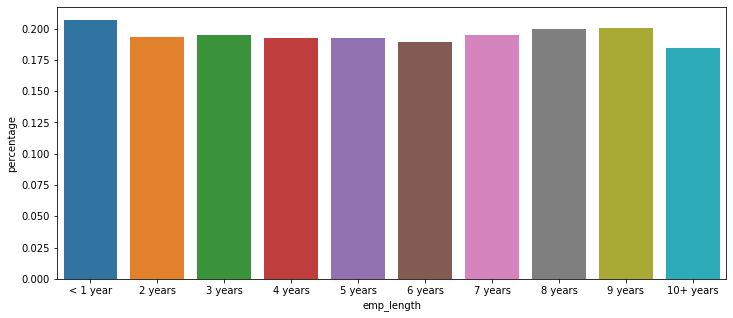

In [139]:
df_loan_repaid_0=df[df['loan_repaid']==0]
df_loan_repaid_1=df[df['loan_repaid']==1]
data1=df_loan_repaid_0.groupby('emp_length').count()['loan_amnt']
data2=df.groupby('emp_length').count()['term']
data_f= pd.concat([data1,data2],axis=1)
data_f['percentage']=data_f['loan_amnt']/data_f['term']
data_f=data_f.reset_index()


fig=plt.figure(figsize=(12,5))
empl_length_order = ['< 1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
sns.barplot(x='emp_length',y='percentage',data=data_f,order=empl_length_order)

In [140]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [141]:
df[['title','purpose']].head(10)

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


In [142]:
df=df.drop('title',axis=1)

In [143]:
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [144]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
def fill_mort_acc(total_acc,mort_acc):
     if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
     else:
        return mort_acc
df['mort_acc']=df.apply(lambda x:fill_mort_acc(x['total_acc'], x['mort_acc']),axis=1)

In [145]:
#dropping rows with missing data
df=df.dropna()

In [68]:
#Cateogrical and Dummy Variables

In [146]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [147]:
subgrade=pd.get_dummies(df['sub_grade'],drop_first=True)
df=pd.concat([df,subgrade],axis=1)

verification_status=pd.get_dummies(df['verification_status'],drop_first=True)
df=pd.concat([df,verification_status],axis=1)

application_type=pd.get_dummies(df['application_type'],drop_first=True)
df=pd.concat([df,application_type],axis=1)

initial_list_status=pd.get_dummies(df['initial_list_status'],drop_first=True)
df=pd.concat([df,initial_list_status],axis=1)

purpose = pd.get_dummies(df['purpose'],drop_first=True)
df=pd.concat([df,purpose],axis=1)

In [155]:
df=df.drop('sub_grade',axis=1)
df=df.drop('verification_status',axis=1)
df=df.drop('application_type',axis=1)
df=df.drop('initial_list_status',axis=1)
df=df.drop('purpose',axis=1)

In [148]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [157]:
df=df.drop('grade', axis=1)

In [158]:
df.select_dtypes(include=['object']).head(5)

,term,emp_length,home_ownership,issue_d,loan_status,earliest_cr_line,address
0,36 months,10+ years,RENT,Jan-2015,Fully Paid,Jun-1990,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,4 years,MORTGAGE,Jan-2015,Fully Paid,Jul-2004,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,< 1 year,RENT,Jan-2015,Fully Paid,Aug-2007,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,6 years,RENT,Nov-2014,Fully Paid,Sep-2006,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,9 years,MORTGAGE,Apr-2013,Charged Off,Mar-1999,"679 Luna Roads\nGreggshire, VA 11650"


In [159]:
def change(x):
    if x=='ANY':
        return "OTHER"
    elif x=='NONE':
        return'OTHER'
    else:
        return x
    
df['home_ownership']=df['home_ownership'].apply(change)
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [160]:
home_ownership=pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df,home_ownership],axis=1)

df=df.drop('home_ownership',axis=1)

In [161]:
df.select_dtypes(include=['object']).head(5)

,term,emp_length,issue_d,loan_status,earliest_cr_line,address
0,36 months,10+ years,Jan-2015,Fully Paid,Jun-1990,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,4 years,Jan-2015,Fully Paid,Jul-2004,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,< 1 year,Jan-2015,Fully Paid,Aug-2007,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,6 years,Nov-2014,Fully Paid,Sep-2006,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,9 years,Apr-2013,Charged Off,Mar-1999,"679 Luna Roads\nGreggshire, VA 11650"


In [162]:
def zip_code(x):
    return x[-5:]
df['zip_code']=df['address'].apply(zip_code)
df=df.drop('address',axis=1)

In [163]:
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [164]:
zip_code=pd.get_dummies(df['zip_code'],drop_first=True)
df=pd.concat([df,zip_code],axis=1)
df=df.drop('zip_code',axis=1)

In [166]:
df=df.drop('issue_d',axis=1)

In [169]:
def earliest_cr_line(x):
    return int(x[-4:])
df['early_cr_line_year']=df['earliest_cr_line'].apply(earliest_cr_line)

pandas.core.series.Series

In [170]:
df=df.drop('earliest_cr_line',axis=1)

In [177]:
def term(x):
    return int(x[:3])
df['term_month']=df['term'].apply(term)
df=df.drop('term',axis=1)

In [178]:
df.select_dtypes(include=['object']).head(5)

,emp_length,loan_status
0,10+ years,Fully Paid
1,4 years,Fully Paid
2,< 1 year,Fully Paid
3,6 years,Fully Paid
4,9 years,Charged Off


In [183]:
def emp_length(x):
    if x=='< 1 year':
        return 0
    elif x=='10+ years':
        return 10
    else:
        return x
df['emp_length']=df['emp_length'].apply(emp_length)

In [187]:
def emp_length_years(x):
    if type(x)==int:
        return x
    else:
        return int(x[:2])
df['emp_years']=df['emp_length'].apply(emp_length_years)
df=df.drop('emp_length',axis=1)

In [189]:
df.select_dtypes(include=['object']).head(5)

,loan_status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Charged Off


In [190]:
#Train_Test_Split

In [210]:
X=df.drop(['loan_status','loan_repaid'],axis=1).values
y=df['loan_repaid'].values

In [211]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [207]:
#Normalizing X_train, X_test

In [281]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [213]:
#Model Training

In [227]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [228]:
model = Sequential()
model.add(Dense(78,activation='relu'))
model.add(Dense(39,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [229]:
model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test))

Train on 263850 samples, validate on 113079 samples
Epoch 1/25
263850/263850 [==============================] - 27s 102us/sample - loss: 0.2677 - val_loss: 0.2578
Epoch 2/25
263850/263850 [==============================] - 26s 98us/sample - loss: 0.2559 - val_loss: 0.2570
Epoch 3/25
263850/263850 [==============================] - 26s 97us/sample - loss: 0.2548 - val_loss: 0.2565
Epoch 4/25
263850/263850 [==============================] - 26s 98us/sample - loss: 0.2541 - val_loss: 0.2585
Epoch 5/25
263850/263850 [==============================] - 26s 98us/sample - loss: 0.2534 - val_loss: 0.2568
Epoch 6/25
263850/263850 [==============================] - 26s 100us/sample - loss: 0.2529 - val_loss: 0.2569
Epoch 7/25
263850/263850 [==============================] - 26s 99us/sample - loss: 0.2524 - val_loss: 0.2567
Epoch 8/25
263850/263850 [==============================] - 26s 98us/sample - loss: 0.2522 - val_loss: 0.2573
Epoch 9/25
263850/263850 [==============================] - 27s 10

In [230]:
losses = pd.DataFrame(model.history.history)

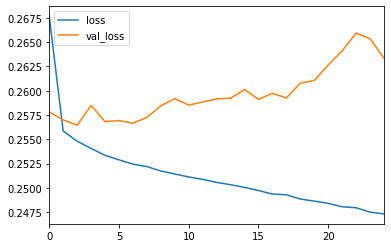

In [231]:
losses.plot()

In [241]:
pred = model.predict_classes(X_test)

In [242]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.47      0.93      0.62     11001
           1       0.99      0.89      0.94    102078

    accuracy                           0.89    113079
   macro avg       0.73      0.91      0.78    113079
weighted avg       0.94      0.89      0.91    113079

[[10197   804]
 [11582 90496]]


In [288]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt                24000.00
int_rate                     8.90
installment                762.08
annual_inc              150000.00
dti                         10.18
open_acc                    14.00
pub_rec                      0.00
revol_bal                20008.00
revol_util                  48.80
total_acc                   33.00
mort_acc                     1.00
pub_rec_bankruptcies         0.00
A2                           0.00
A3                           0.00
A4                           0.00
A5                           1.00
B1                           0.00
B2                           0.00
B3                           0.00
B4                           0.00
B5                           0.00
C1                           0.00
C2                           0.00
C3                           0.00
C4                           0.00
C5                           0.00
D1                           0.00
D2                           0.00
D3                           0.00
D4            

In [289]:
new_customer=scaler.transform(new_customer.values.reshape(1,79))

In [290]:
model.predict_classes(new_customer)

array([[1]])